# Assignment Part 2 Solution

In [ ]:
#| default_exp assignment_part_2_solution

In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

--------------------

## Nyquist Plot

### Q1. Consider a close loop system with unity feedback. 
 - For the $G(s)=s-1$, hand sketch the Nyquist diagram
 - Determine $Z = N+P$, algebraically find the closed-loop pole location, and show that the closed loop pole location is consistent with the Nyquist diagram calculation. 
 - Use the controller $D(s) = k = 2$.

#### Solution

In [ ]:
s = control.TransferFunction.s
G_s = (s-1)
D_s = 2

D_s*G_s

TransferFunction(array([ 2, -2]), array([1]))

To sketch the Nyquist diagram we need four points
  - 1. $|G|$ and $\angle G$ at $\omega=0$ (start of the plot)
  - 2. $|G|$ and $\angle G$ at $\omega=\infty$ (mid point of the plot)
  - 3. Intersections with the imaginary axis 
  - 4. Intersections with the real axis 
  

in our case:

- for $\omega=0$, $G\approx $

<!-- - for $\omega=0$, $G\approx -\frac{1}{s} \Rightarrow |G|=\infty\;\;\angle-180 \rightarrow \angle90$ (when surrounding the pole at the origin to the right and as we sweep across);

- for $\omega=\infty$, $G\approx \frac{s}{s} =1 \Rightarrow GD \approx 2$  -->

(-10.0, 3.0)

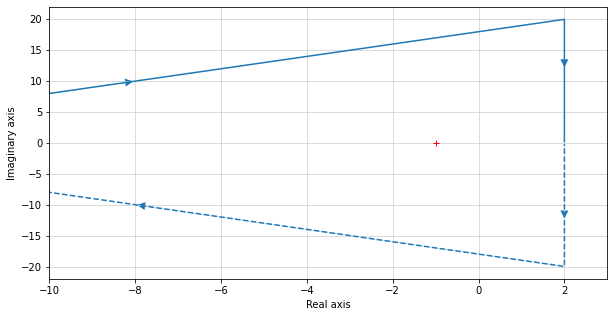

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.nyquist_plot(2*(s-1)/s)
ax.set_xlim(-10, 3)

- $P =0$ as we are avoiding the pole at the origin modifying appropriate the Nyquist contour to the right.
- $N =1$, (N is the number of clockwise encirclements of -1)
- $Z=N+P=1$ number of zeros in the right half plane (or poles in closed loop)

Let's verify it algebrically:
- Characteristic equation is $1+DG=0$. This is: $1+2\frac{(s-1)}{s}=0 \rightarrow s+2s-2=0 \rightarrow s=\frac{2}{3}$

In [ ]:
control.pole(control.feedback(2*(s-1)/s, 1, -1))

array([0.66666667])

As expected the closed loop pole is in the right half plane.

### Q2. For controller $D(s) = k$ and $G(s) = \frac{s + 1}{s^2(s + 10)}$

- Hand sketch the asymptotes of the Bode plot magnitude and phase for the open-loop transfer function
- Hand sketch Nyquist diagram.
- Discuss stability margins


#### Solution 


<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q2-bode.png" alt="assignment-q2-bode" style="width: 600px;"/> </td>    
    </tr>
</table>


The interesting behavior happens when the Nyquist contour approaches the double pole at the origin. We can choose to go around the left (dotted) or right (solid) side of the poles to avoid them. If we take the left path, the outside of the diagram (at infinite magnitude) travels CCW, whereas if we take the right, the diagram travels CW.


<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q2-nyquist-noted1.png" alt="assignment-q2-nyquist" style="width: 600px;"/> </td>    
    </tr>
</table>



- At point D, the two open-loop poles at the origin contribute 2 x 90° = 180°, and the zero and the other pole contributes 0°. The total angle in D is hence -180. The magnitude is infinity.

- Moving from point D to point E along the contour yields a net change in angle of +90° from the zero and of -90 from the pole at -10. The angles of the two poles at the origin remain the same. Thus, the mapping does not change and stays at -180. The magnitude changes from infinity to zero due to the presence of the two more two more poles than zeros.

Analitically:

$$G(jw)|_{w=0}\approx\frac{1}{-10w^2}\;\;\text{which means}\;\; |G|=\infty;\;\angle{G}=180$$
$$G(jw)|_{w=\infty}\approx\frac{1}{-w^2}\;\;\text{which means}\;\; |G|=0;\;\angle{G}=180$$



As we travel along the contour at infinity, moving from E to A, the function magnitude stays at zero (one infinite zero length divided by three infinite pole lengths).

As the vectors move from E to A, the zero’s vector, the pole at -10 vector and the two poles at the origin’ vectors undergo changes of -180° each: -180-3(-180)=360°. The mapped vector has a net change of +360°. The mapping is shown in the zoomed window, where the resultant vector changes by 360° with a magnitude of ε that approaches zero.


Analytically:
    $$
    \frac{R_{-1}\angle{\theta_{-1}}}{R_{0}\angle{\theta_{0}}R_{0}\angle{\theta_{0}}R_{-10}\angle{\theta_{-10}}}
    $$
    
where $R_{-1}\angle{\theta_{-1}}$ is the vector from the zero at -1 to any point on the s-plane, and $R_{0}\angle{\theta_{0}}$ is the vector from a pole at the origin to any point on the s-plane, and $R_{-10}\angle{\theta_{-10}}$ is the vector from a pole at -10 to any point on the s-plane.

Around the infinite semicircle, all $R_i =\infty$, and all angles can be approximated as if the vectors originated at the origin. 

Thus at point E, $G(s) = 0\angle{-180}$, since all $\theta_i=90$

At point F  all $R_i =\infty$, all $\theta_i=0$ and hence $G(s) = 0\angle{0}$

At point A  all $R_i =\infty$, all $\theta_i=-90$ and hence $G(s) = 0\angle{180}$

The mapping between A and B is the mirror of the plot between D and E.

Finally, the mapping over the section B,C,D: magnitude is infinity. The angle of the zero and pole at -10 does not change, but each pole at the origin changes by +180, resulting in a total change in the function of $-2 x 180=-360^o$.
Thus, the mapping through B, C, D is shown as infinite in length and rotating -360°. 

Analytically,

$$
\frac{R_{-1}\angle{\theta_{-1}}}{R_{0}\angle{\theta_{0}}R_{0}\angle{\theta_{0}}R_{-10}\angle{\theta_{-10}}}
$$

We can see that at
- point B: $1\angle0/[(\epsilon\angle{-90})(\epsilon\angle{-90})(10\angle{0}) = \infty\angle{180}$
- point C: $1\angle0/[(\epsilon\angle{0})(\epsilon\angle{0})(10\angle{0})  = \infty\angle{0}$
- point D: $1\angle0/[(\epsilon\angle{90})(\epsilon\angle{90})(10\angle{0})  = \infty\angle{-180}$

The Nyquist diagram is now complete, and a test radius drawn from -1 in
shows one counterclockwise revolution, and one clockwise revolution, yielding zero encirclements.

System is stable:
- P = 0
- N = 0
- Z = 0

If we took the right (solid) path, then there is one zero crossing infinitesimally close to 0. P = 0 since there are no open loop poles in the Nyquist contour. If −1/k ≤ 0, then there are no encirclements and N = Z = 0, and the system is stable. If −1/k > 0 then there is one CW encirclement, N = −1, Z = 1, and the system is unstable. These are the same ranges as the first case, and the range of stable k is between 0 and ∞.

We can verify it with Python:

In [ ]:
G_s = (s + 1)/(s**2*(s + 10))
print(G_s)


   s + 1
------------
s^3 + 10 s^2



And here are the closed loop poles:

In [ ]:
control.pole(control.feedback(G_s, 1, -1))

array([-9.90926834+0.j        , -0.04536583+0.31441623j,
       -0.04536583-0.31441623j])

And the Nyquist diagram:

(-5.0, 5.0)

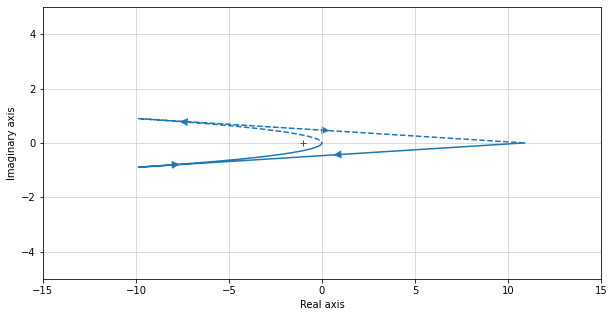

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.nyquist(G_s)

ax.set_xlim(-15, 15)
ax.set_ylim(-5, 5)

**Note**: the python (or the Matlab) plot does not show the behaviour around zero. In this case, it does not affect the stability.

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q2-bode-stability-margins.png" alt="assignment-q2-bode-stability-margins" style="width: 600px;"/> </td>    
    </tr>
</table>

In [ ]:
control.stability_margins(G_s)

(inf,
 16.103065477223083,
 0.2801245641585543,
 nan,
 0.32414037926002703,
 0.3243557908146078)

## Gain and Phase margins

### Q3. Given a closed loop system with unity gain with the following loop transfer function:

$$G(s) = \frac{125(s + 1)}{(s+5)(s^2 +4s+25)}$$

- Plot the Bode magnitude and phase plots for the open loop system 
- Determine the gain and phase margin.

#### Solution

In [ ]:
G_s = 125*(s + 1)/((s+5)*(s**2 + 4*s + 25))

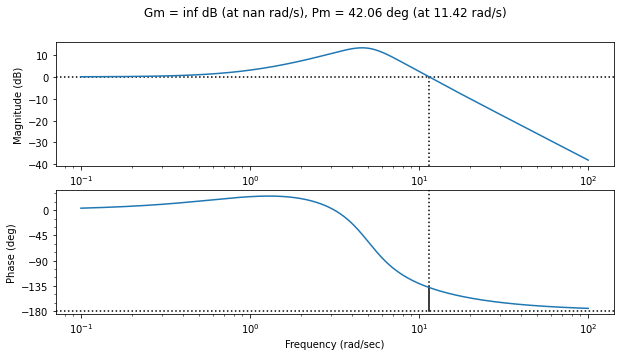

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.bode(G_s, dB=True, margins=True, wrap_phase= True);

## Root Locus

### Q4. Properties of the Root Locus

Given

$$G(s) = \frac{K(s+2)}{(s^2+4s+13)}$$

- Calculate the angle of G(s) at the point $(-3 + j0)$ by finding the algebraic sum of angles
of the vectors drawn from the zeros and poles of G(s) to the given point.

- Determine if the point $(-3 + j0)$ is on the root locus.

- If the point specified in a is on the root locus, find the gain, K, using the lengths of the vectors.

#### Solution

- Sum of angles = 180°
- Point is on the root locus
- K = 10

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q3-root-locus.png" alt="assignment-q3-root-locust" style="width: 400px;"/> </td>    
    </tr>
</table>

From the diagram:

$$
\sum \text{angles} = 180-\tan^{-1}\Big(\frac{-3}{-1}\Big)-\tan^{-1}\Big(\frac{3}{-1}\Big)=180^o
$$

The angle is 180, the point is on the root locus

$$
K = \frac{\prod{\text{pole lengths}}}{\prod{\text{zero lengths}}} = \frac{\sqrt{1^2+3^2}\cdot \sqrt{1^2+3^2}} {1} =10
$$

### Q5. Sketching the Root Locus

- Sketch the root locus for the system shown 

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q3-root-locus-1.png" alt="assignment-q3-root-locus-1" style="width: 600px;"/> </td>    
    </tr>
</table>


#### Solution

Let us begin by calculating the asymptotes:

$$
\sigma_a = \frac{-1-2-4-(-3)}{4-1} = \frac{-4}{3}
$$

angles:

$$
\theta_a = \frac{(2k+1)\pi}{\text{number finite poles}-\text{number finite zeros}}
$$

- $k = 0$, $\theta_a=\pi/3$
- $k = 1$, $\theta_a=\pi$
- $k = 2$, $\theta_a=5\pi/3$

Rule 4 states that the locus begins at the open-loop poles and ends at the open-loop zeros. In this case, there are more open-loop poles than open-loop zeros. Thus, there must be zeros at infinity. The asymptotes tell us how we get to these zeros at infinity.

<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/assignment-q3-root-locus-2.png" alt="assignment-q3-root-locus-2" style="width: 400px;"/> </td>    
    </tr>
</table>



----------------

## Lead-Lag Compensation Design

### Q6. Design a lead compensator 

Given a unity feedback system where the plant 
$$G(s) =  \frac{K}{s(s+50)(s+120)}$$

Design a lag-lead compensator to have:
- 20% overshoot
- $\Phi_m > 48^o$
- $T_s=0.2s$
- Steady state requirement $K_v=\lim_{s\rightarrow0}sG(s)=50$

#### Solution (pag 629, Nise)

- vel. constant is at page 345

- Overshoot requires 
$$
\zeta = \frac{-\log{\frac{\%}{100}}}{\sqrt{\pi^2+log^2{\frac{\%}{100}}}} = 0.456
$$

In [ ]:
-np.log(20/100)/np.sqrt(np.pi**2+np.log(20/100)**2)

0.4559498107691261


- $G(0)=50=\frac{K}{50\cdot120}$

In [ ]:
# Solving for K gives us
K = 50*50*120
print(K)

300000


The uncompensated Bode plot for this gain is shown below

In [ ]:
# the following are some numbers that are useful to plot the Bode plot
20*np.log10(300000), 20*np.log10(1/50), 20*np.log10(1/120), 110-75

(109.54242509439325, -33.979400086720375, -41.583624920952495, 35)

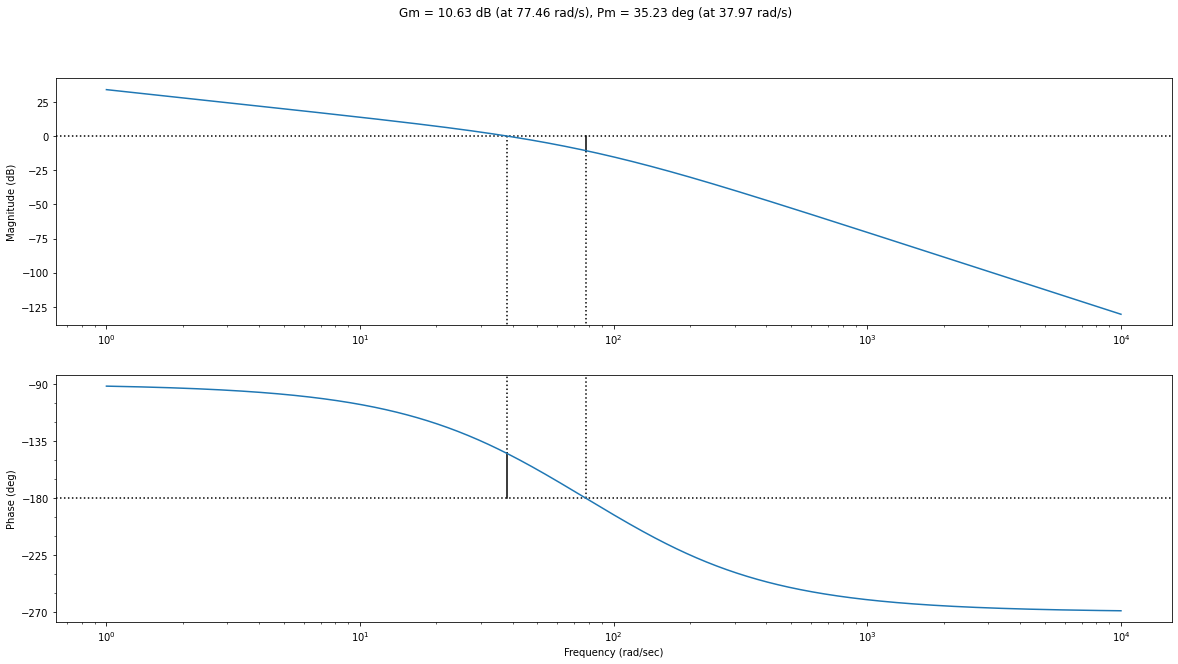

In [ ]:
G_s = 300000/(s*(s+50)*(s+120))

fig, ax = plt.subplots(1, 1, figsize=(20,10))
control.bode(G_s, dB=True, margins=True, wrap_phase= False);

The uncompensated system’s phase margin measurement is taken where the magnitude plot crosses 0 dB. We find that when the magnitude plot crosses 0 dB, the phase angle is -144.8. Therefore, the uncompensated system’s phase margin is -180+144.8=35.2

To design the compensator:
1. Choose the maximum phase you would like to add $\Phi_{max}$ and solve for $a$
2. Choose the frequency $w_{m}$ where you would like to add $\Phi_{max}$ and solve for $\tau$

We have a requirement for $\Phi_m>48$ and with a $10^o$ correction factor the compensator needs to contribute $22.9^o$

--------------------
From the Book Nise:

 $$
 \Phi_{max} = \sin^{-1} \Big( \frac{a-1}{a+1} \Big) = 22.9 \Rightarrow a = \frac{1-sin(\Phi_{max})}{1+sin(\Phi_{max})} = 0.44
 $$
 

The compensator’s peak magnitude is calculated as $M_{max} = 1/\sqrt{a} = 1.51$ 

Now find the frequency at which the uncompensated system has a magnitude $1/M_{max}= 2.27$, or $-3.56dB$. Note that this corresponds to: $ Gain_{m} = \sqrt{a} $

--------------------

My approach

$$
 \Phi_{max} = \sin^{-1} \Big( \frac{a-1}{a+1} \Big) = 22.9 \Rightarrow a = 1.38/(1-0.38) = 2.26
 $$

We can read it from the Bode plot, and -3.56dB corresponds to $w_{max}=50rad/s$.

**Freq at Max phase**
$$
w_{m} = \frac{1}{\tau\sqrt{a}} = 50 rad/s \Rightarrow \tau=0.013
$$


In [ ]:
np.sin(22.9*3.14/180), 1.38/(1-0.38)

(0.388937290711108, 2.225806451612903)

In [ ]:
1/np.sqrt(2.26), 1/(50*np.sqrt(2.26))

(0.6651901052377394, 0.013303802104754786)

In [ ]:
1/(2.26*0.013), 1/0.013

(34.036759700476516, 76.92307692307692)

**Upper cutoff frequency**
$$
w_u = \frac{1}{a\tau} = 34.0
$$

**Lower cutoff frequency**

$$
w_l = \frac{1}{\tau} = 76.9
$$



$$
Lead(s) = \frac{a\tau s + 1}{\tau s + 1} = \frac{(2.26\cdot 0.013)s+1}{0.013 s+ 1} = \frac{0.029s+1}{0.013 s+ 1}
$$

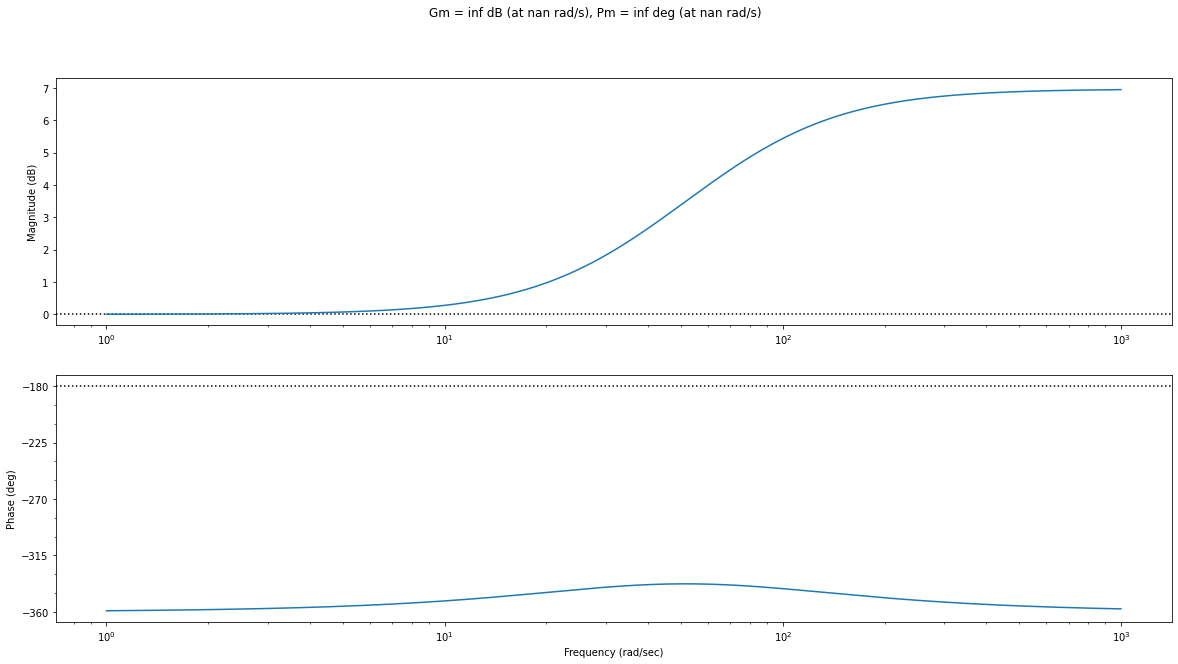

In [ ]:
Lead_s = (0.029*s+1)/(0.013*s+1)

fig, ax = plt.subplots(1, 1, figsize=(20,10))
control.bode(Lead_s, dB=True, margins=True, wrap_phase= False);

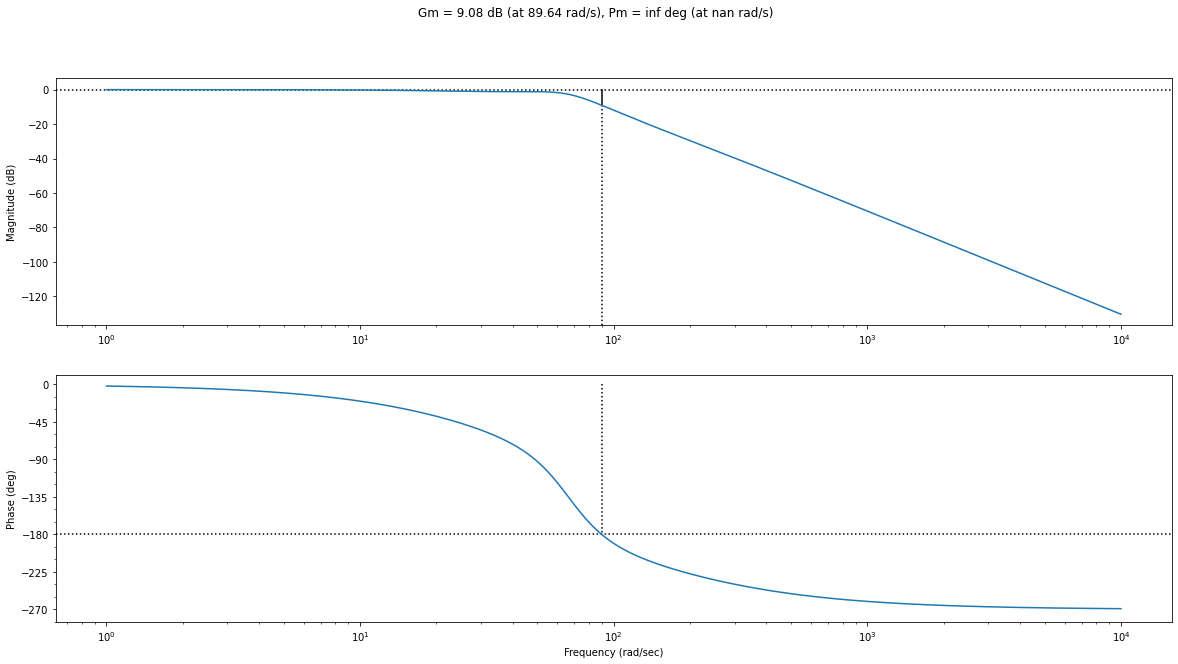

In [ ]:
G_s = 300000/(s*(s+50)*(s+120))

G_cl = control.feedback(G_s, Lead_s, -1)

fig, ax = plt.subplots(1, 1, figsize=(20,10))
control.bode(G_cl, dB=True, margins=True, wrap_phase= False);

We can read it from the Bode plot, and -3.56dB corresponds to $w_{max}=50rad/s$.

**Freq at Max phase**
$$
w_{m} = \frac{1}{\tau\sqrt{a}} = 50 rad/s \Rightarrow \tau=\frac{1}{\sqrt{a}w_m}=0.03
$$

In [ ]:
1/(np.sqrt(2.26)*50)

0.013303802104754786

**Upper cutoff frequency**
$$
w_u = \frac{1}{a\tau} = 75.75
$$

**Lower cutoff frequency**

$$
w_l = \frac{1}{\tau} = 33.33
$$



In [ ]:
w_u = 1/(0.44*0.03) 
w_l = 1/0.03  # compensator zero
print(w_u, w_l)

75.75757575757576 33.333333333333336


In [ ]:
1/0.013, 1/0.03

(76.92307692307692, 33.333333333333336)

$$
Lead(s) = \frac{a\tau s + 1}{\tau s + 1} = \frac{0.013 s+1}{0.03 s+ 1}
$$

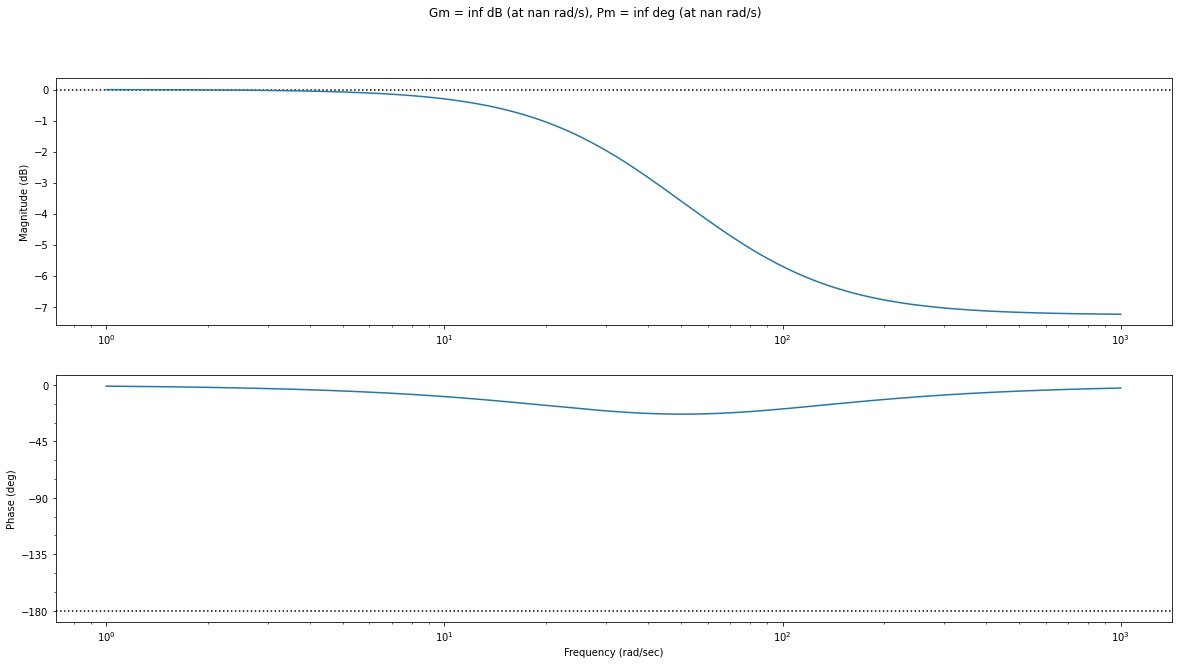

In [ ]:
Lead_s = (0.013*s+1)/(0.03*s+1)

fig, ax = plt.subplots(1, 1, figsize=(20,10))
control.bode(Lead_s, dB=True, margins=True, wrap_phase= False);

------

## Putting everything together

**Consider the DC motor transfer function between of the motor-load combination which is given by:**

$$
\frac{\theta(s)}{V_f(s)} = \frac{K_m}{s(Js+f)(L_fs+R_f)} = \frac{\frac{K_m}{JL_f}}{s(s+\frac{f}{J})(s+\frac{R_f}{L_f})}. \;\;\;\;(1)
$$

The system above can also be written as:

$$
\frac{\theta(s)}{V_f(s)} = \frac{\frac{K_m}{JL_f}}{s(s+\frac{f}{J})(s+\frac{R_f}{L_f})} = \frac{\frac{K_m}{fR_f}}{s(\tau_f s+1)(\tau_L s+1)}
$$

where $\tau_f=\frac{L_f}{R_f}$ and $\tau_L=\frac{J}{f}$.

When $\tau_L > \tau_f$, the field time constant $\tau_f$ can be neglected.

Let's choose the following values:

- (J)     moment of inertia of the rotor     0.01 kg.m^2
- (f)     motor viscous friction constant    0.1 N.m.s
- (Ke)    electromotive force constant       0.01 V/rad/sec
- (Kt)    motor torque constant              0.01 N.m/Amp
- (R)     electric resistance                1 Ohm
- (L)     electric inductance                0.5 H

_Note that in SI units, $K_e = K_t = K$_

$$
\frac{\theta(s)}{V_f(s)} = \frac{\frac{0.01}{0.1\cdot1}}{s(0.5/1s+1)(0.01/0.1s+1)} = \frac{0.1}{s(0.5s+1)(0.1s+1)}
$$

Which equivalent to:

$$
G(s) = \frac{0.1}{0.05 s^3 + 0.6 s^2 + s}
$$

In [ ]:
J = 0.01
f = 0.1
K = 0.01
R = 1
L = 0.5

s = control.TransferFunction.s
G_motor = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
print(G_motor)


         0.1
----------------------
0.05 s^3 + 0.6 s^2 + s



With block diagram:


<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/homework/dc-motor-field-current-bd.png" alt="dc-motor-field-current-bd" style="width: 600px;"/> </td>    
    </tr>
</table>


In [ ]:
s = control.TransferFunction.s
G_motor = 0.1/(s*(0.5*s+1)*(0.1*s+1))

We can calculate the step response:

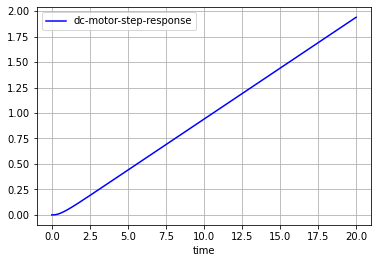

In [ ]:
T, yout = control.step_response(G_motor, T=np.linspace(0, 20, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

### Q7. Close the loop with a unitary feedback and discuss the system performance.

#### Solution

In [ ]:
G_motor_fb = control.feedback(G_motor, 1, -1)

print(G_motor_fb)


            0.1
----------------------------
0.05 s^3 + 0.6 s^2 + s + 0.1



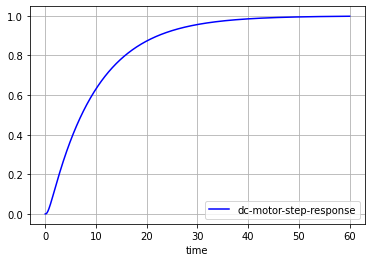

In [ ]:
T, yout = control.step_response(G_motor_fb, T=np.linspace(0, 60, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

### Q8 Calculate the stability margins

#### Solution

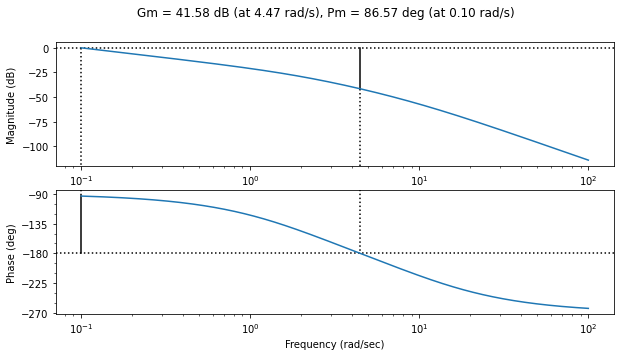

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.bode_plot(G_motor, dB=True, margins=True);

This looks like a good response.

Let's see what happens when we increase the inertia (add load to the motor).

### Q9. Increase the inertia of the rotor and discuss what happens
Try values `J=[0.1, 1, 2]`

#### Solution

In [ ]:
J = 2
f = 0.1
K = 0.01
R = 1
L = 0.5

s = control.TransferFunction.s
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))

<IPython.core.display.Javascript object>


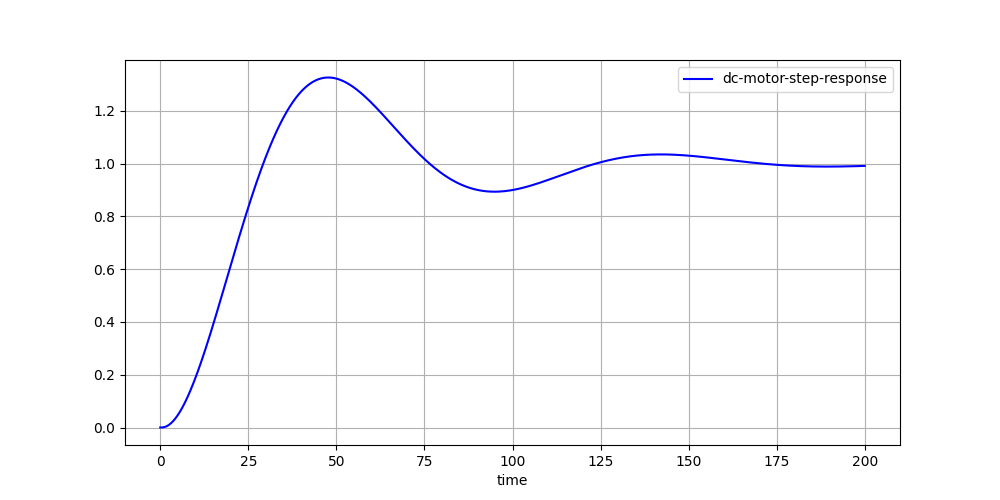

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
T, yout = control.step_response(control.feedback(G_motor_loaded, 1, -1), T=np.linspace(0, 200, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

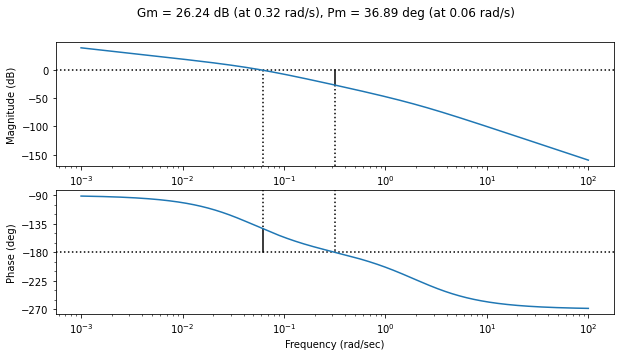

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.bode_plot(G_motor_loaded, dB=True, margins=True);

**Discussions**
- The response of the system is relatively slow
- The system oscillates when higher loads are used
- Gain and phase margins are still good, but they are now reduced

We can plot the the root locus for the open loop system

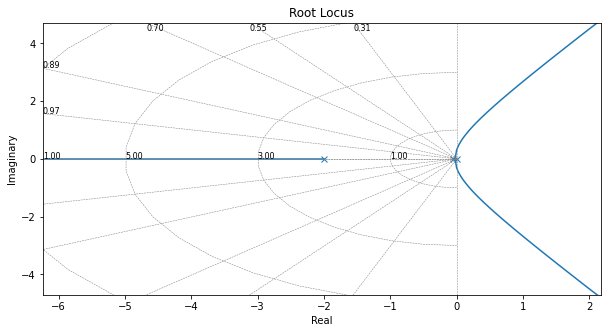

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.root_locus(G_motor_loaded);

There is not too much margin, given that we have two dominant poles very close to the imaginary axis

### Q10. Designing a Controller for the Motor

Design requirements:

- $t_r \approx 2.75 s $ (90%)
- Max overshoot $20\%$ at $5.75s$
- Settling time to $\pm0.05\%$ $\approx 11.15s$
- Zero steady state error


- Choose any method you prefer.
- Discuss the performance

#### Solution

One way to improve performance is to place a zero to attract the dominant poles:

$$
C(s) = s+1
$$


In [ ]:
K = 1 # we start from 1
C_s = K*(s+0.23)

<IPython.core.display.Javascript object>


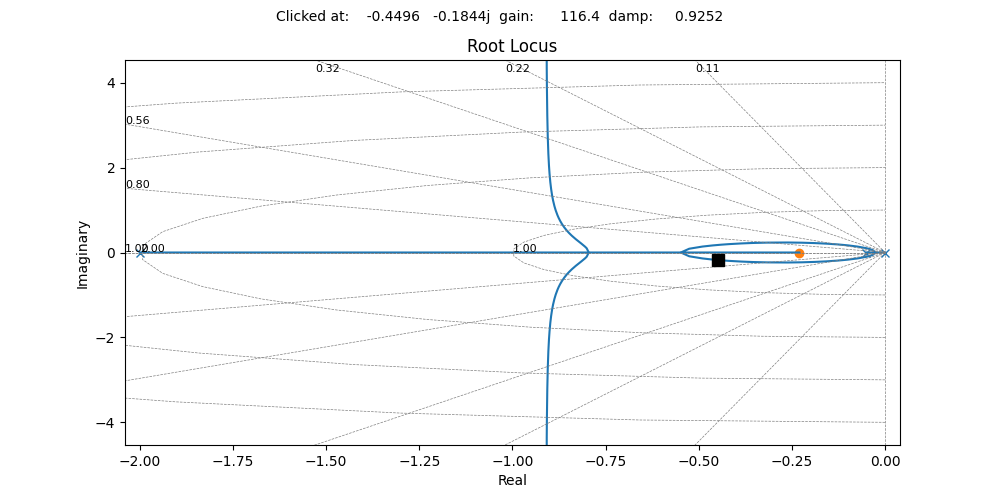

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(10,5))
control.root_locus(G_motor_loaded*C_s);

From the root locus we can select
$$
K=100
$$

In [ ]:
K = 100
C_s = K*(s+0.23)

<IPython.core.display.Javascript object>


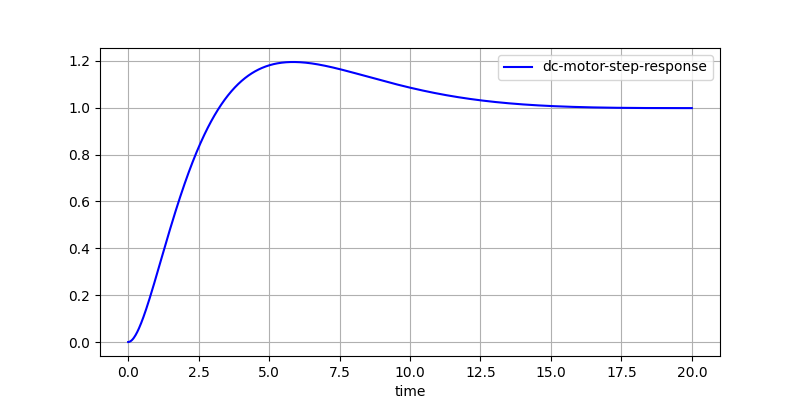

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
T, yout = control.step_response(control.feedback(G_motor_loaded*C_s, 1, -1), T=np.linspace(0, 20, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

Performance:

- $t_r \approx 2.75 s $ (90%)
- Max overshoot $20%$ at $5.75s$
- Settling time to $\pm0.05\%$ $\approx 11.15s$
- Zero steady state error

Note that this controller is in practise a lead compensator with a pole very far in the left half place (e.g. s=100)

### Q11. Optional
- What happens if you add noise or load disturbances?
- How would you implement a PID controller?

#### Solution

PID:

$$
C(s) = 0.36*\frac{(35s+1)(35s+1)}{s}
$$

In [ ]:
J = 2
f = 0.1
K = 0.01
R = 1
L = 0.5

s = control.TransferFunction.s
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))

print('G_motor_loaded', G_motor_loaded)

PID = (0.36*(1+35*s)*(1+35*s))/s
print('PID', PID)

G_motor_loaded 
         0.1
---------------------
10 s^3 + 20.5 s^2 + s

PID 
441 s^2 + 25.2 s + 0.36
-----------------------
           s



<IPython.core.display.Javascript object>


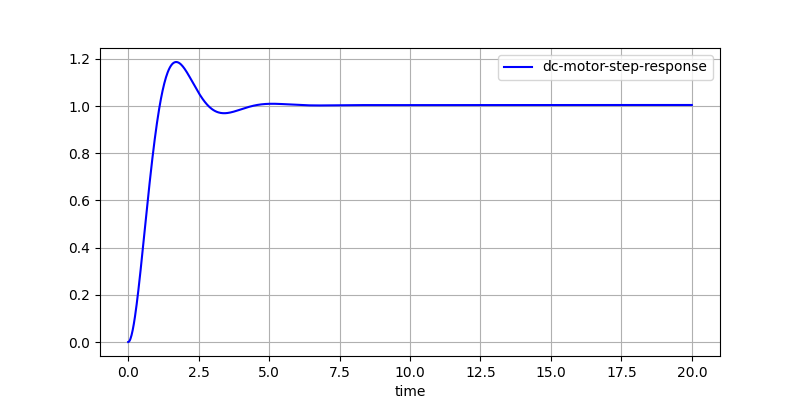

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
T, yout = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 20, 1000));

plt.plot(T, yout, 'b', label='dc-motor-step-response')
plt.legend()
plt.xlabel('time')
plt.grid()

Let's analyse what happens if we change the load $J$:

`J = 0.01, 2, 10`

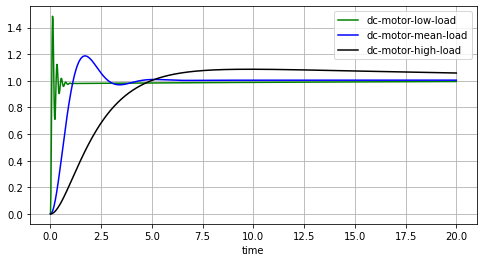

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8,4))

J = 0.01
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_low_load, yout_low_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 20, 1000));


J = 2
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_mean_load, yout_mean_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 20, 1000));

J = 10
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_high_load, yout_high_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 20, 1000));

plt.plot(T_low_load, yout_low_load, label='dc-motor-low-load', color='green')
plt.plot(T_mean_load, yout_mean_load, label='dc-motor-mean-load', color='blue')
plt.plot(T_high_load, yout_high_load, label='dc-motor-high-load', color='black')
plt.legend()
plt.xlabel('time')
plt.grid()

A different set of PID parameters:

In [ ]:
PID = 0.0635*(1+81*s+40**2*s**2)/s
print(PID)


101.6 s^2 + 5.144 s + 0.0635
----------------------------
             s



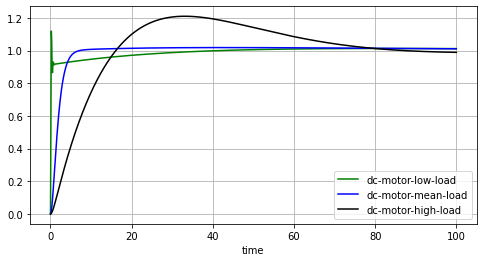

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8,4))

J = 0.01
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_low_load, yout_low_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 100, 1000));


J = 2
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_mean_load, yout_mean_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 100, 1000));

J = 10
G_motor_loaded = (K/(f*R))/(s*(L/R*s+1)*(J/f*s+1))
T_high_load, yout_high_load = control.step_response(control.feedback(G_motor_loaded*PID, 1, -1), T=np.linspace(0, 100, 1000));

plt.plot(T_low_load, yout_low_load, label='dc-motor-low-load', color='green')
plt.plot(T_mean_load, yout_mean_load, label='dc-motor-mean-load', color='blue')
plt.plot(T_high_load, yout_high_load, label='dc-motor-high-load', color='black')
plt.legend()
plt.xlabel('time')
plt.grid()